In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam_mail.csv')
df

,text,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [3]:
df['spam'].value_counts()

0    3672
1    1499
Name: spam, dtype: int64

In [4]:
df.drop_duplicates(inplace = True)

In [5]:
df

,text,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5165,"Subject: fw : crosstex energy , driscoll ranch...",0
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5169,Subject: industrial worksheets for august 2000...,0


In [6]:
df['spam'].value_counts()

0    3531
1    1462
Name: spam, dtype: int64

In [7]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [8]:
x = df.text.values

In [9]:
y = df.spam.values

# split dataset

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

# Data Preprocessing

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
cv = CountVectorizer()
x_train = cv.fit_transform(xtrain)

In [14]:
x_train.toarray()

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# ML algorithm

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
model = MultinomialNB()
model.fit(x_train,ytrain)

MultinomialNB()

In [17]:
x_test = cv.transform(xtest)

In [18]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
model.score(x_test,ytest)

0.9819819819819819

In [20]:
emails = ['hye i am looking for machine learning tutorial in bangla language','hey you win an iphone x giveaway for free pleasse']

In [21]:
cv_emails = cv.transform(emails)

In [22]:
model.predict(cv_emails)

array([0, 1], dtype=int64)

# Performance

In [23]:
pred = model.predict(x_test)

In [24]:
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(ytest,pred)

0.9819819819819819

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(ytest,pred)

array([[692,  10],
       [  8, 289]], dtype=int64)

Text(0.5, 1.05, 'Confusion Matrix (Logistic Regression)')

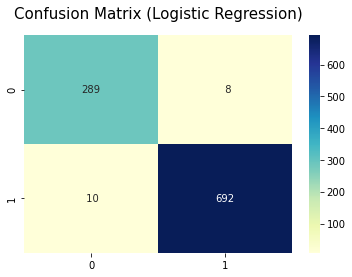

In [29]:
cnf_matrix = confusion_matrix(ytest, pred, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="YlGnBu")
plt.title('Confusion Matrix (Logistic Regression)', y=1.05, size=15)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       702
           1       0.97      0.97      0.97       297

    accuracy                           0.98       999
   macro avg       0.98      0.98      0.98       999
weighted avg       0.98      0.98      0.98       999



# K-fold Cross validation 

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
cv = CountVectorizer()
x_t = cv.fit_transform(x)

In [34]:
cv_score = cross_val_score(model, x_t, y, cv=10)

In [35]:
cv_score

array([0.982     , 0.972     , 0.982     , 0.97995992, 0.98196393,
       0.98597194, 0.98396794, 0.98597194, 0.98396794, 0.98797595])

In [36]:
cv_score.mean()

0.9825779559118237

<center><h1>The End</h1></center>